# Gun Deaths in America

The data is from [FiveThirtyEight's _Gun Deaths in America_ project](https://github.com/fivethirtyeight/guns-data). Source: CDC.

Author: Ken Norton

In [31]:
import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
from pylab import rcParams
from scipy.stats import pearsonr

plt.style.use('seaborn-talk')
plt.style.use('fivethirtyeight')

guns = pd.read_csv('full_data.csv')

In [32]:
guns = pd.DataFrame.from_dict(guns)
guns.describe()

,Unnamed: 0,year,month,police,age,hispanic
count,100798.000000,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000
mean,50399.500000,2013.000357,6.567601,0.013909,43.857601,114.179607
std,29098.020554,0.816278,3.405609,0.117114,19.496181,61.595734
min,1.000000,2012.000000,1.000000,0.000000,0.000000,100.000000
25%,25200.250000,2012.000000,4.000000,0.000000,27.000000,100.000000
50%,50399.500000,2013.000000,7.000000,0.000000,42.000000,100.000000
75%,75598.750000,2014.000000,9.000000,0.000000,58.000000,100.000000
max,100798.000000,2014.000000,12.000000,1.000000,107.000000,998.000000


In [33]:
guns.sample(5)

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
63270,63271,2013,9,Suicide,0,M,70.0,White,100,Home,Less than HS
63708,63709,2013,10,Homicide,0,F,76.0,White,100,Home,HS/GED
48200,48201,2013,1,Homicide,0,M,18.0,Black,100,Street,Less than HS
17181,17182,2012,3,Homicide,0,M,20.0,White,100,Home,Less than HS
57562,57563,2013,4,Suicide,0,M,43.0,White,100,Trade/service area,NaN


In [34]:
guns.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [35]:
guns_duplicates = guns.duplicated()
print('Number of duplicate entries: {}'.format(guns_duplicates.sum()))

Number of duplicate entries: 0


In [36]:
guns.isnull().sum()

Unnamed: 0       0
year             0
month            0
intent           1
police           0
sex              0
age             18
race             0
hispanic         0
place         1384
education     1422
dtype: int64

In [37]:
missing_age = pd.isnull(guns['age'])
guns[missing_age].head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
9,10,2012,2,Suicide,0,M,NaN,Black,998,Home,NaN
8153,8154,2012,8,Suicide,0,F,NaN,White,998,Home,NaN
25596,25597,2012,11,Suicide,0,M,NaN,White,100,Other unspecified,Some college
35447,35448,2013,5,Homicide,0,M,NaN,White,998,Other specified,NaN
35448,35449,2013,5,Homicide,0,M,NaN,White,998,Other specified,NaN


In [38]:
missing_intent = pd.isnull(guns['intent'])
guns[missing_intent].head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
47994,47995,2013,4,NaN,0,M,27.0,White,100,NaN,BA+


In [39]:
guns.describe()

,Unnamed: 0,year,month,police,age,hispanic
count,100798.000000,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000
mean,50399.500000,2013.000357,6.567601,0.013909,43.857601,114.179607
std,29098.020554,0.816278,3.405609,0.117114,19.496181,61.595734
min,1.000000,2012.000000,1.000000,0.000000,0.000000,100.000000
25%,25200.250000,2012.000000,4.000000,0.000000,27.000000,100.000000
50%,50399.500000,2013.000000,7.000000,0.000000,42.000000,100.000000
75%,75598.750000,2014.000000,9.000000,0.000000,58.000000,100.000000
max,100798.000000,2014.000000,12.000000,1.000000,107.000000,998.000000


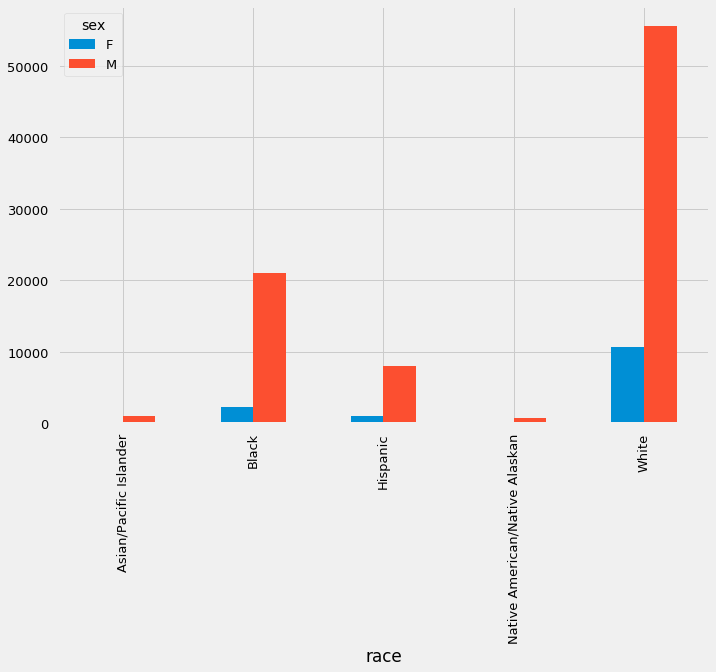

In [40]:
guns_clean = guns[['race', 'sex']].dropna()
guns_clean.groupby(['race', 'sex']).size().unstack(fill_value=0).plot.bar()

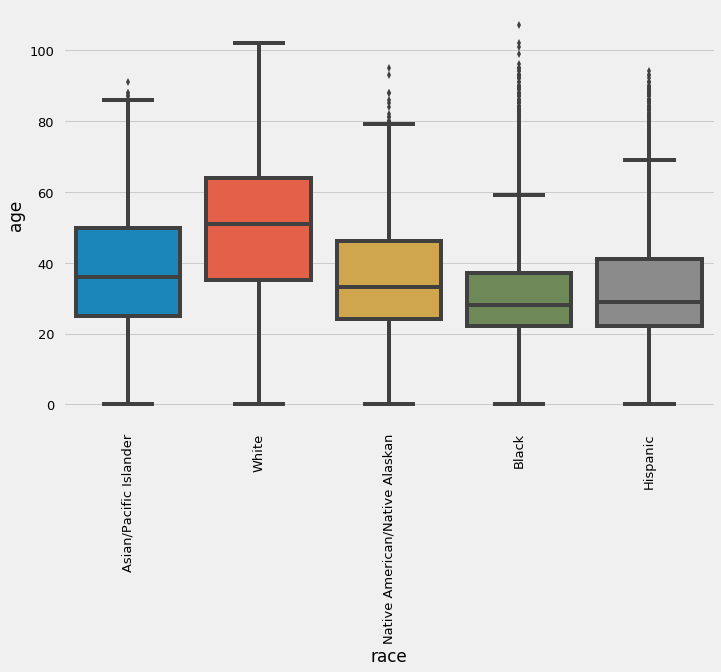

In [41]:
plt.xticks(rotation=90)
sns.boxplot(x='race', y='age', data=guns)

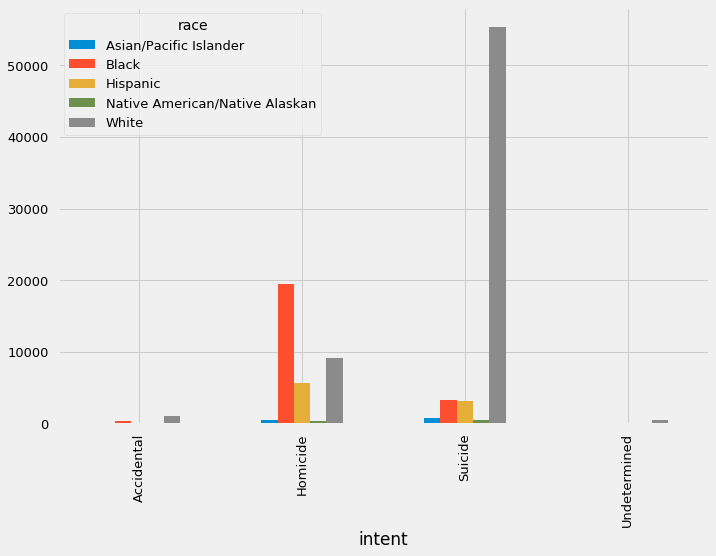

In [42]:
guns_clean = guns[['intent', 'race']].dropna()
guns_clean.groupby(['intent', 'race']).size().unstack(fill_value=0).plot.bar()

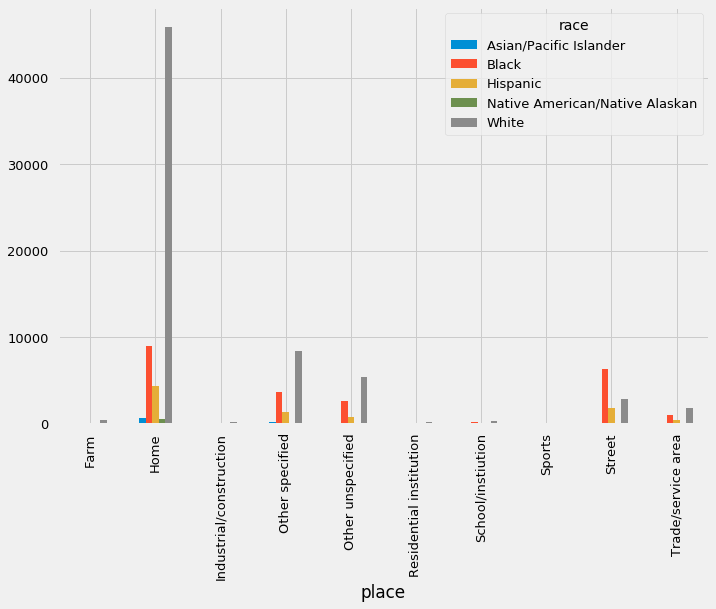

In [43]:
guns_clean = guns[['place', 'race']].dropna()
guns_clean.groupby(['place', 'race']).size().unstack(fill_value=0).plot.bar()

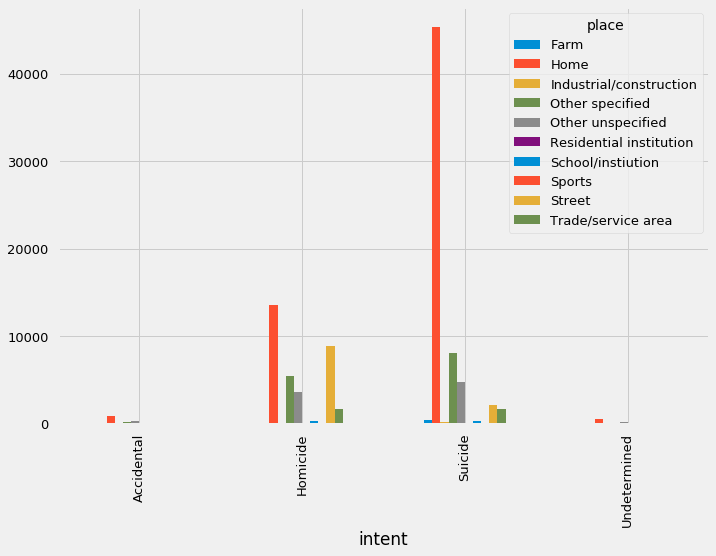

In [44]:
guns_clean = guns[['intent', 'place']].dropna()
guns_clean.groupby(['intent', 'place']).size().unstack(fill_value=0).plot.bar()

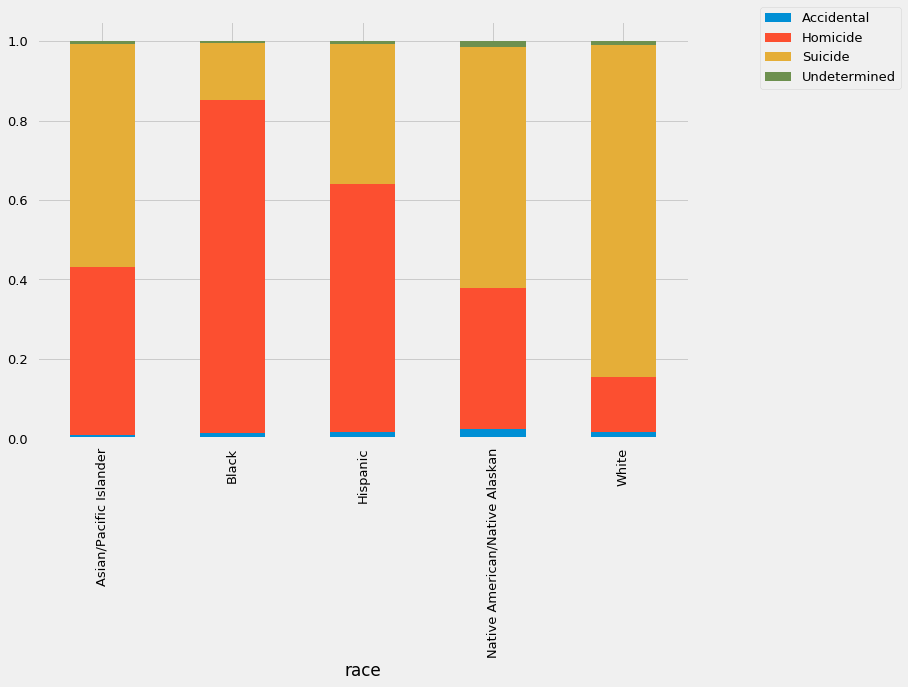

In [45]:
ax = guns.groupby('race')['intent'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

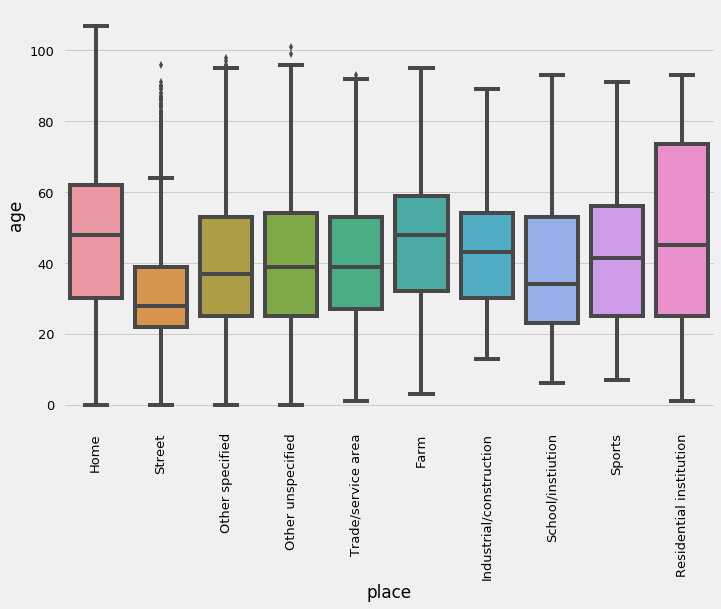

In [46]:
plt.xticks(rotation=90)
sns.boxplot(x='place', y='age', data=guns)

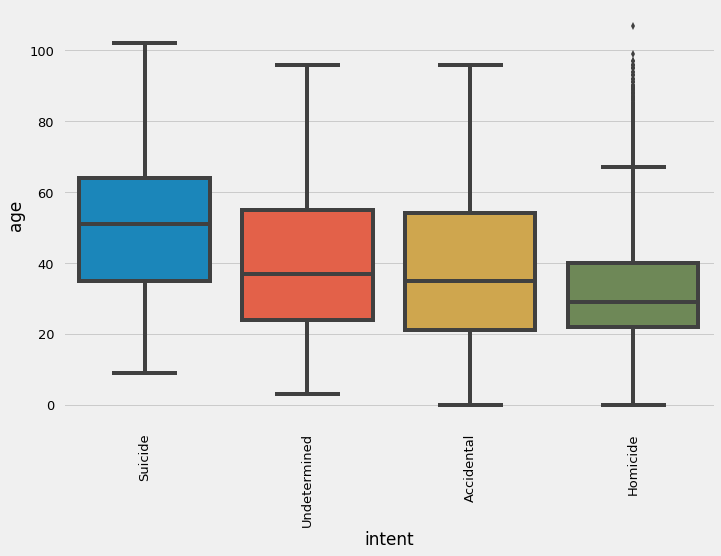

In [47]:
plt.xticks(rotation=90)
sns.boxplot(x='intent', y='age', data=guns)

(array([0.00033161, 0.00039971, 0.00222063, 0.00818967, 0.01386856,
        0.01344812, 0.01277305, 0.01254802, 0.01522166, 0.01822987,
        0.02540102, 0.01862366, 0.01420017, 0.01173083, 0.00936809,
        0.00788471, 0.00678032, 0.00363295, 0.00109551, 0.00013028]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. ]),
 <a list of 20 Patch objects>)

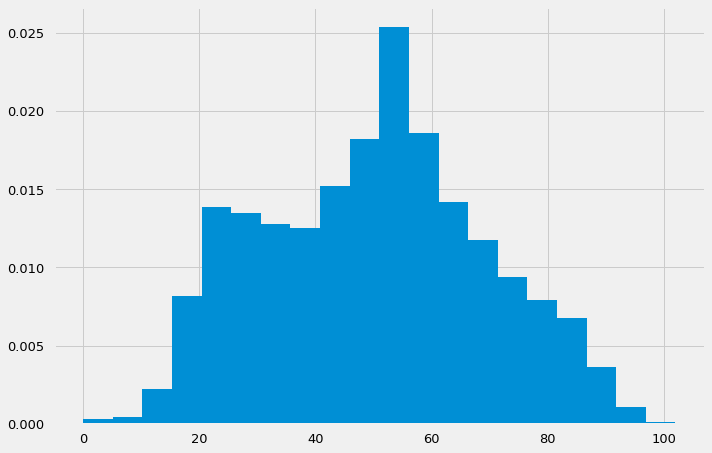

In [49]:
x = guns[['race', 'age']].dropna()
x = guns[guns['race'] == 'White']
x = x['age']
plt.hist(x, density=True, bins=20)

(array([8.74676159e-04, 4.25301252e-04, 5.44064620e-03, 3.70493562e-02,
        4.19363083e-02, 3.49709973e-02, 2.10323506e-02, 1.35775418e-02,
        1.14911583e-02, 7.39863687e-03, 4.73448563e-03, 3.30611539e-03,
        1.76540142e-03, 1.12343727e-03, 8.74676159e-04, 5.85792290e-04,
        1.68515590e-04, 1.28392831e-04, 1.60491038e-05, 1.60491038e-05]),
 array([  0.  ,   5.35,  10.7 ,  16.05,  21.4 ,  26.75,  32.1 ,  37.45,
         42.8 ,  48.15,  53.5 ,  58.85,  64.2 ,  69.55,  74.9 ,  80.25,
         85.6 ,  90.95,  96.3 , 101.65, 107.  ]),
 <a list of 20 Patch objects>)

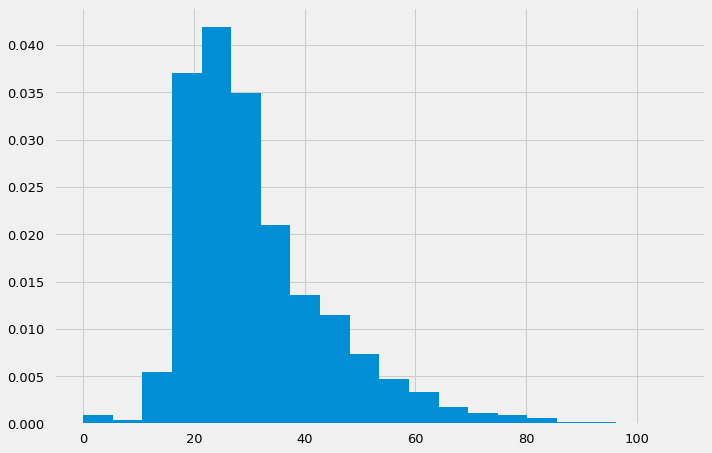

In [50]:
x = guns[guns['race'] == 'Black']
x = x['age']
plt.hist(x, density=True, bins=20)

(array([9.93922457e-04, 9.35456430e-04, 5.49580652e-03, 3.32140183e-02,
        3.75989704e-02, 3.29270033e-02, 2.07129188e-02, 1.49300972e-02,
        1.35641182e-02, 9.60437368e-03, 6.17082338e-03, 4.78889911e-03,
        2.39710710e-03, 1.39255446e-03, 1.12679979e-03, 6.53756482e-04,
        2.97645228e-04, 9.03565870e-05, 1.59452801e-05, 5.31509335e-06]),
 array([  0.  ,   5.35,  10.7 ,  16.05,  21.4 ,  26.75,  32.1 ,  37.45,
         42.8 ,  48.15,  53.5 ,  58.85,  64.2 ,  69.55,  74.9 ,  80.25,
         85.6 ,  90.95,  96.3 , 101.65, 107.  ]),
 <a list of 20 Patch objects>)

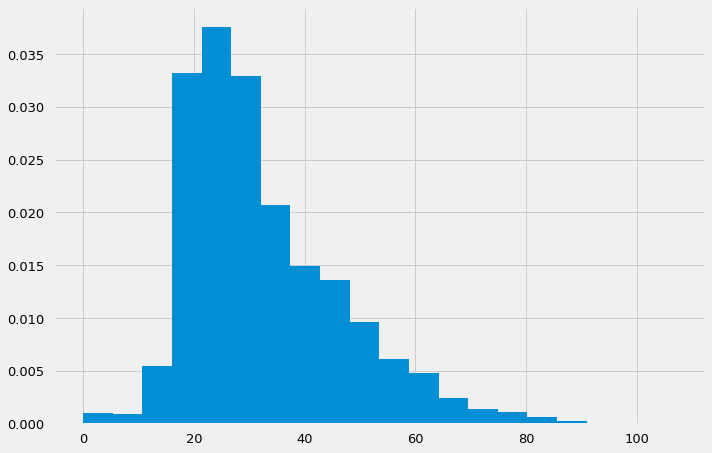

In [51]:
x = guns[['intent', 'age']].dropna()
x = guns[guns['intent'] == 'Homicide']
x = x['age']
plt.hist(x, density=True, bins=20)

(array([9.30360363e-04, 4.86816469e-04, 5.83638856e-03, 3.47749231e-02,
        3.95403154e-02, 3.35957454e-02, 2.07870632e-02, 1.45558124e-02,
        1.23921837e-02, 8.32456162e-03, 5.44693538e-03, 4.12712184e-03,
        2.09871989e-03, 1.47126755e-03, 1.24949560e-03, 7.84315422e-04,
        3.51589672e-04, 1.40635869e-04, 1.08181438e-05, 1.08181438e-05]),
 array([  0.  ,   5.35,  10.7 ,  16.05,  21.4 ,  26.75,  32.1 ,  37.45,
         42.8 ,  48.15,  53.5 ,  58.85,  64.2 ,  69.55,  74.9 ,  80.25,
         85.6 ,  90.95,  96.3 , 101.65, 107.  ]),
 <a list of 20 Patch objects>)

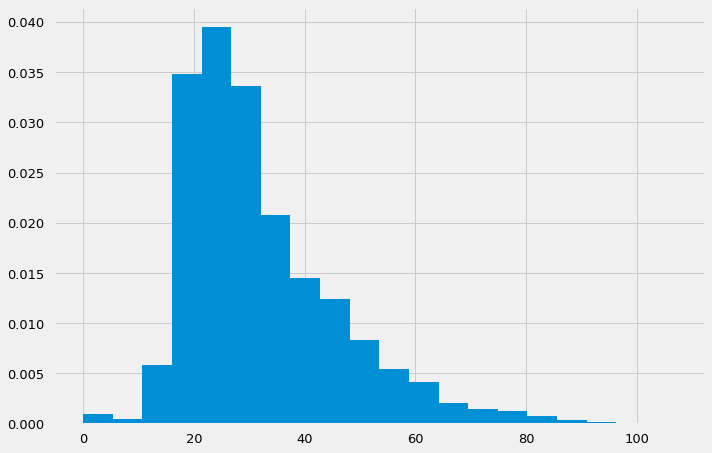

In [52]:
x = guns[guns['race'] != 'White']
x = x['age']
plt.hist(x, density=True, bins=20)

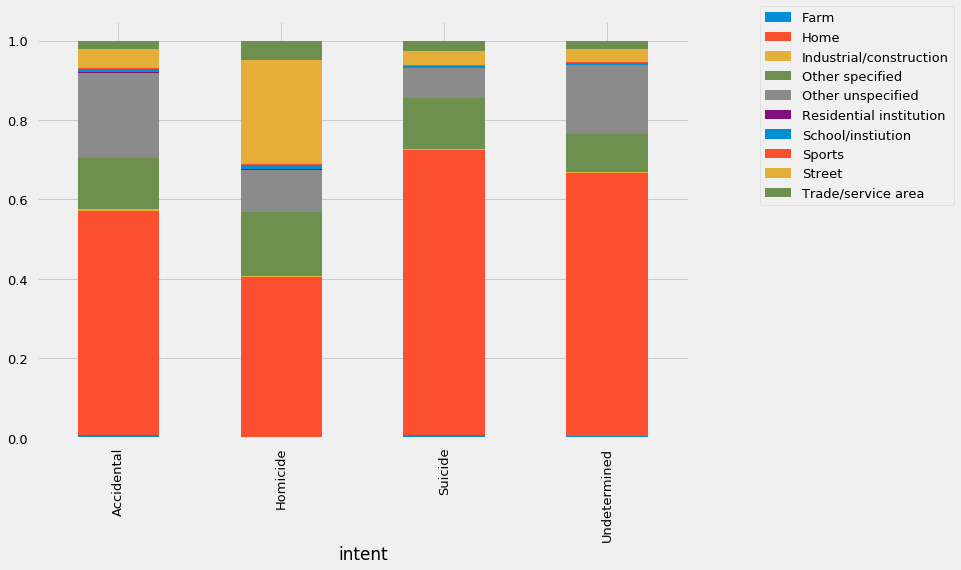

In [53]:
ax = guns.groupby('intent')['place'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

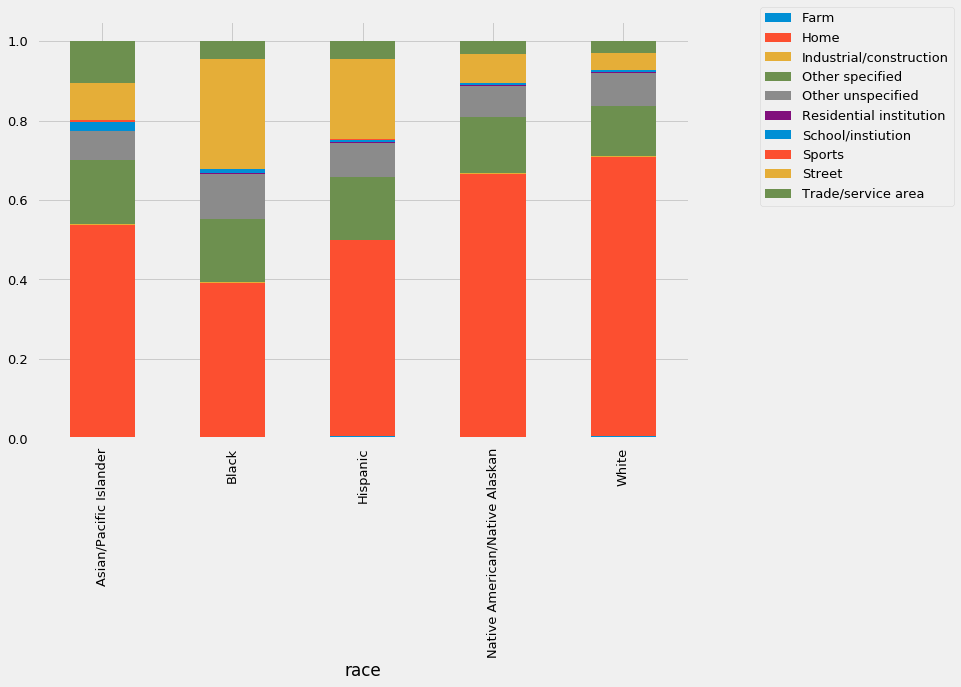

In [54]:
ax = guns.groupby('race')['place'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

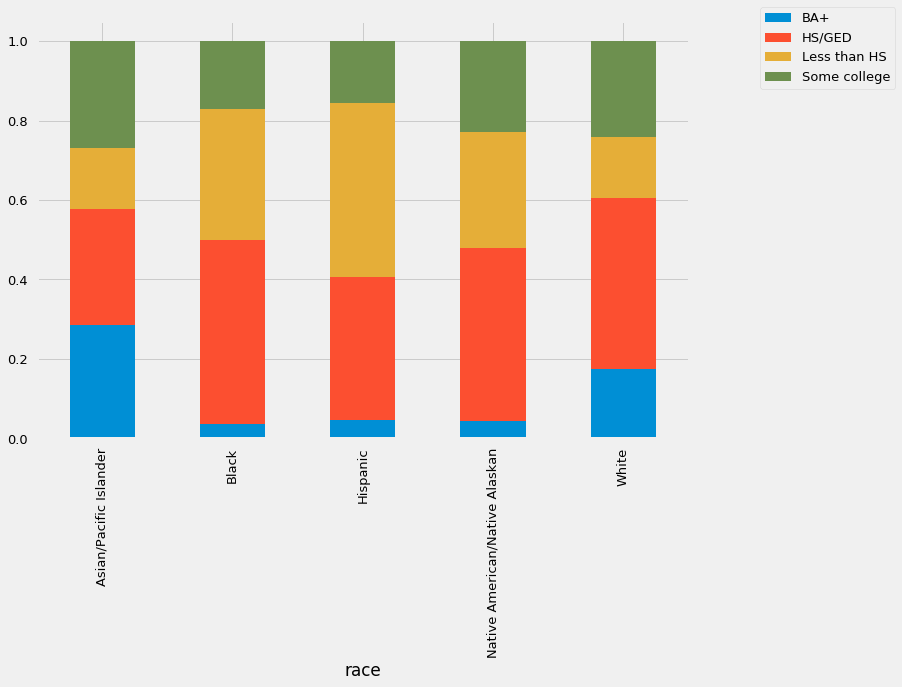

In [55]:
ax = guns.groupby('race')['education'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

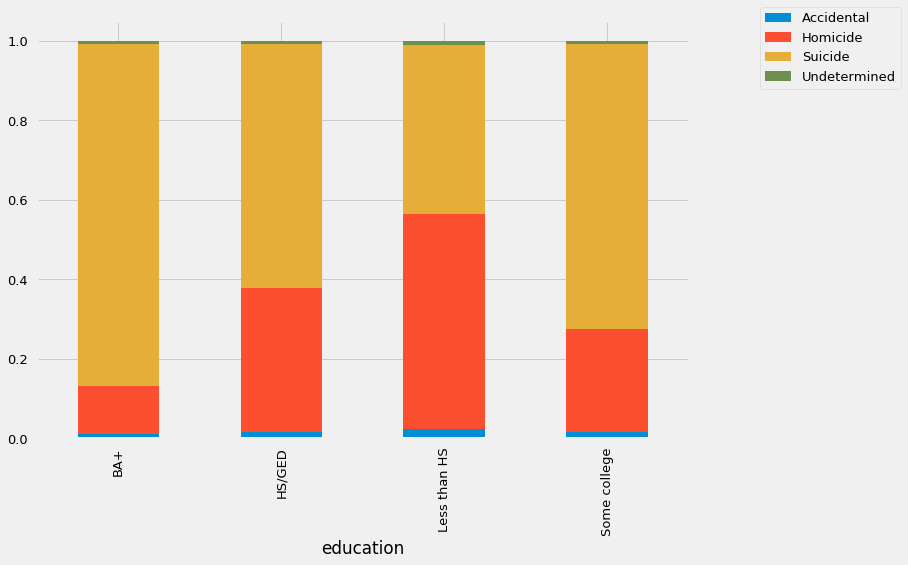

In [56]:
ax = guns.groupby('education')['intent'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

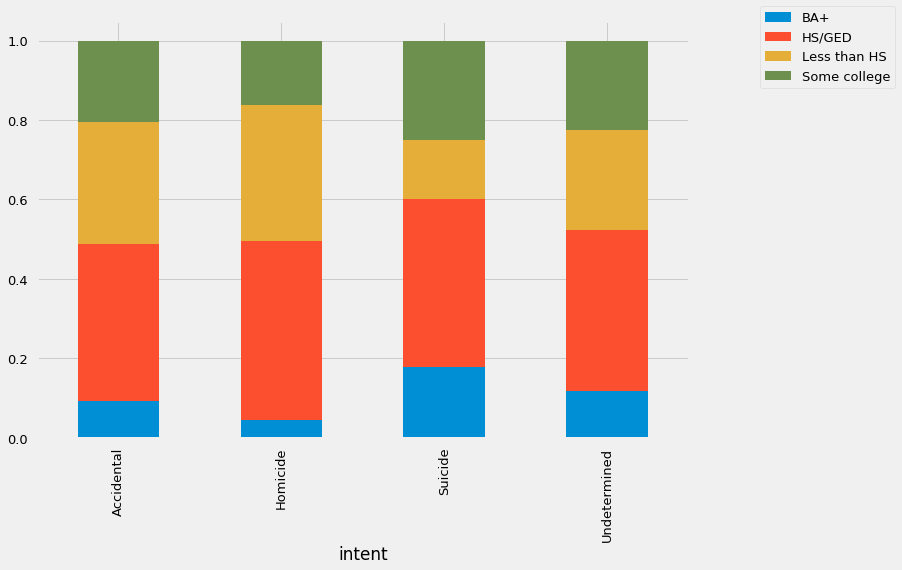

In [57]:
ax = guns.groupby('intent')['education'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

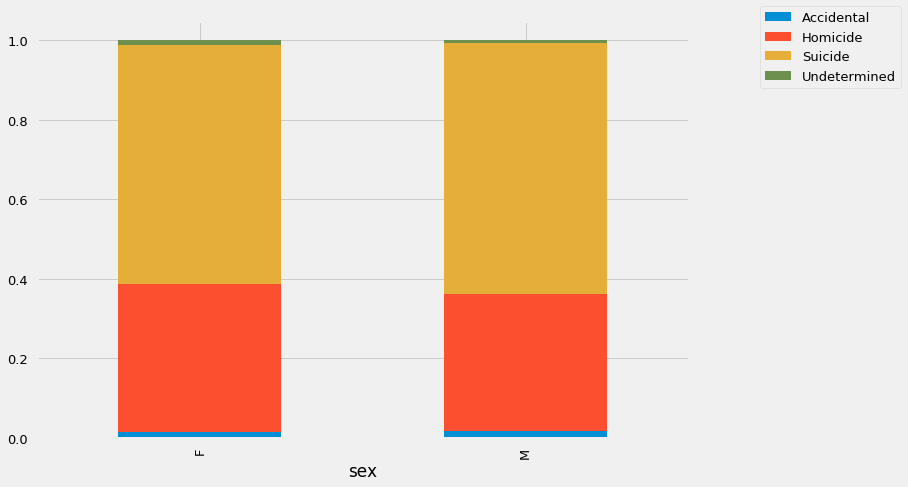

In [58]:
ax = guns.groupby('sex')['intent'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

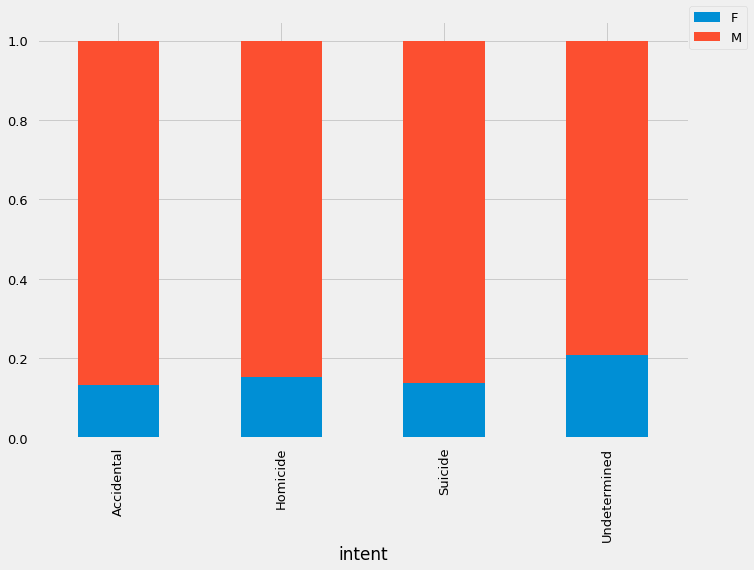

In [59]:
ax = guns.groupby('intent')['sex'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

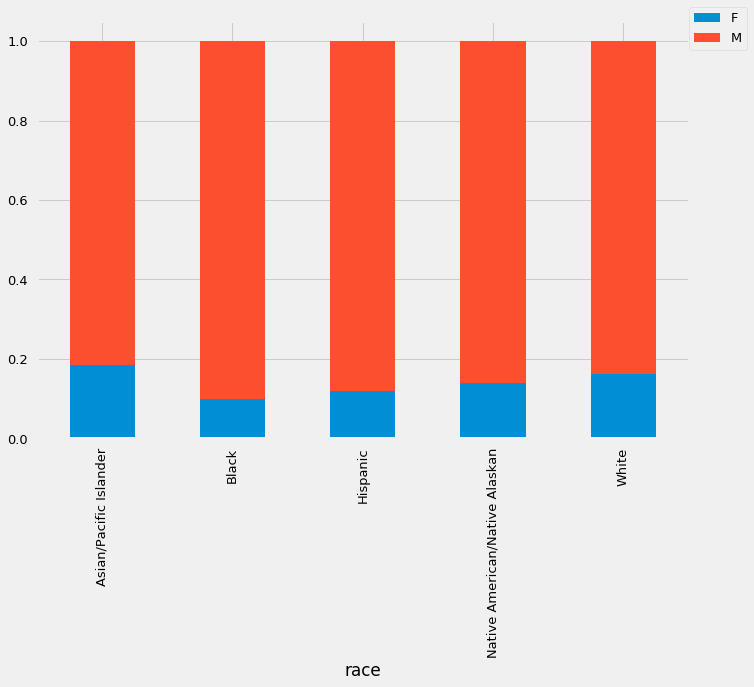

In [60]:
ax = guns.groupby('race')['sex'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))